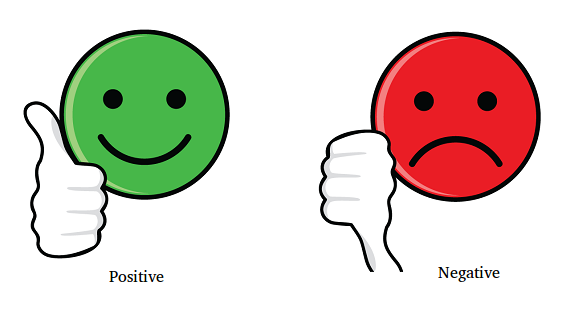

<center><h1 style = "background-image: linear-gradient(90deg, green, red);border:0;color:white">Introduction</h1></center>
<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">Our data consists of 50000 comments. There are 25000 negative and 25000 positive comments. Comments are of different lengths and are given in sentences.
</p>

<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">Using the imdb dataset, we will train our LSTM model with positive and negative comments about movies. First, we will make comments available for the LSTM model. After training our model, we will examine the accuracy and loss values on the chart.
 </p>
    

<h2 style = "background-image: linear-gradient(90deg, green, red);border:0;color:white">Content :</h2>

<ul>
    <li style = "color:red;font-size:15px"> <a href = "#1" style = "color:black;font-weight:bold"> Load and Check Data </a> </li>
    <li style = "color:green;font-size:15px"> <a href = "#2" style = "color:black;font-weight:bold"> Ineffective Words </a> </li> 
    <li style = "color:red;font-size:15px"> <a href = "#3" style = "color:black;font-weight:bold"> Clearing data </a> </li> 
    <li style = "color:green;font-size:15px"> <a href = "#4" style = "color:black;font-weight:bold">  Train - Test Split  </a> </li> 
    <li style = "color:red;font-size:15px"> <a href = "#5" style = "color:black;font-weight:bold"> Creating a Dictionary </a> </li> 
    <li style = "color:green;font-size:15px"> <a href = "#6" style = "color:black;font-weight:bold"> Bring the comments to the same size </a> </li> 
    <li style = "color:red;font-size:15px"> <a href = "#7" style = "color:black;font-weight:bold"> Create RNN Model </a> </li> 
    <li style = "color:green;font-size:15px"> <a href = "#8" style = "color:black;font-weight:bold"> Result </a> </li>
    <li style = "color:red;font-size:15px"> <a href = "#9" style = "color:black;font-weight:bold"> Visualization </a> </li>
    
    
</ul>

<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0">Import Libraries</h2>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
import re
import nltk 
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('punkt')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# warning library
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id ='1' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0">Load and Check Data </h2>

In [ ]:
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [ ]:
# we are browsing the data
data.head()

In [ ]:
# the columns 
data.columns

In [ ]:
# we are looking at the size of our data.
data.shape

In [ ]:
data.info()

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > we see that there is no null value in our data. </p> </li>
</ul>

In [ ]:
# statistical summary of our data
data.describe()

In [ ]:
sns.countplot(data["sentiment"], palette = ["green","red"])
plt.show()
print(data.sentiment.value_counts())

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > We see that the number of positive and negative comments is equal. </p> </li>
</ul>

In [ ]:
data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > We convert our sentiment property to int values. </p> </li>
        <li  style = "color:green" > <p style = "color:black;font-weight:bold" > positive --> 1 </p> </li>
        <li  style = "color:red" > <p style = "color:black;font-weight:bold" > negative --> 0 </p> </li>
</ul>

In [ ]:
data.head()

<a id ='2' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0">Ineffective Words </h2>

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > Let's first take a look at the ineffective English words. </p> </li>
</ul>

In [ ]:
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('english')
#stop_word_list

<a id ='3' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0">Clearing data </h2>

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > process of clearing punctuation marks in data. </p> </li>
     <li  style = "color:green" > <p style = "color:black;font-weight:bold" > cleaning unnecessary marks in data. </p> </li>
        <li  style = "color:red" > <p style = "color:black;font-weight:bold" > capitalization to lowercase. </p> </li>
     <li  style = "color:green" > <p style = "color:black;font-weight:bold" > cleaning extra spaces. </p> </li>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > removal of stopwords in sentences. </p> </li>
</ul>

In [ ]:
data['review'] = data['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

data['review'] = data['review'].apply(lambda x: x.lower())

data['review'] = data['review'].apply(lambda x: x.strip())

"""
I closed the stopword process because it took a long time.
If you want, you can try opening the codes in the comment line.
"""
#def token(values):
   # words = nltk.tokenize.word_tokenize(values)
    #filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
    #not_stopword_doc = " ".join(filtered_words)
    #return not_stopword_doc
#data['review'] = data['review'].apply(lambda x: token(x))

<a id ='4' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Train - Test Split </h2>

In [ ]:
sentiment = data['sentiment'].values
sentiment

In [ ]:
data = data['review']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

<a id ='5' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Creating a Dictionary </h2>

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > We create a dictionary of 15000 most used words in English for later use. </p> </li>
</ul>

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 15000)
tokenizer.fit_on_texts(data)
#tokenizer.word_index

<a id ='6' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Bring the comments to the same size </h2>

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > comments of different lengths cannot train the RNN model. That's why we need to make the sentences the same size. </p> </li>
</ul>

In [ ]:
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)


<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" >We replace the words in our sentences with whichever index they are included in the dictionary we have created above. </p> </li>
</ul>

In [ ]:
#Then we take the word count of each of our sentences in our data and create a list.
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
#Here, when setting the number of tokens, a number is determined by taking into account the variability around the average.
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > max_tokens : This value will allow us to reduce the distribution of sentences in our data and the sentences with opposite lengths, if any, to the average. </p> </li>
</ul>

In [ ]:
#It is checked what percentage of the data this determined number covers.
np.sum(num_tokens < max_tokens) / len(num_tokens)

In [ ]:
#data is adjusted according to the number of tokens specified
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [ ]:
x_train_pad.shape

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > As you can see, we have set it to shape 567. So max_tokens
 </p> </li>
</ul>

In [ ]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > We write a function to revert the sentences that we have made int.
 </p> </li>
</ul>

In [ ]:
#normal comment
print(return_to_sentence(x_train_pad[9]))

In [ ]:
#token equivalent of comment
print(x_train_pad[9])

<a id ='7' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Create LSTM Model </h2>

In [ ]:
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=15000,output_dim=embedding_size,input_length=max_tokens,name='embedding_layer'))

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model.summary()

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > we train our model.
 </p> </li>
</ul>

In [ ]:
history = model.fit(x_train_pad, y_train, validation_split=0.3, epochs=5, batch_size=1000, shuffle=True, verbose = 1)

<a id ='8' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Result </h2>

In [ ]:
result = model.evaluate(x_test_pad, y_test)

<a id ='9' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Visualization (Acc - Loss)</h2>

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()